In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

from keras import optimizers
from keras import losses
from keras import metrics
from keras.datasets import fashion_mnist

In [18]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train / 255., x_test / 255.

In [19]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),

    Flatten(),
    Dense(64, activation="relu"),

    Dense(10, activation="softmax")
])


In [20]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [21]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)





history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)


Epoch 1/20
235/235 [==============================] - 17s 68ms/step - loss: 0.7104 - accuracy: 0.7412 - val_loss: 0.5045 - val_accuracy: 0.8099
Epoch 2/20
235/235 [==============================] - 16s 70ms/step - loss: 0.4241 - accuracy: 0.8467 - val_loss: 0.3929 - val_accuracy: 0.8559
Epoch 3/20
235/235 [==============================] - 16s 70ms/step - loss: 0.3568 - accuracy: 0.8722 - val_loss: 0.3686 - val_accuracy: 0.8642
Epoch 4/20
235/235 [==============================] - 16s 70ms/step - loss: 0.3277 - accuracy: 0.8810 - val_loss: 0.3376 - val_accuracy: 0.8794
Epoch 5/20
235/235 [==============================] - 17s 71ms/step - loss: 0.3013 - accuracy: 0.8908 - val_loss: 0.3232 - val_accuracy: 0.8862
Epoch 6/20
235/235 [==============================] - 17s 71ms/step - loss: 0.2856 - accuracy: 0.8965 - val_loss: 0.3051 - val_accuracy: 0.8903
Epoch 7/20
235/235 [==============================] - 17s 71ms/step - loss: 0.2710 - accuracy: 0.9021 - val_loss: 0.3041 - val_accuracy:

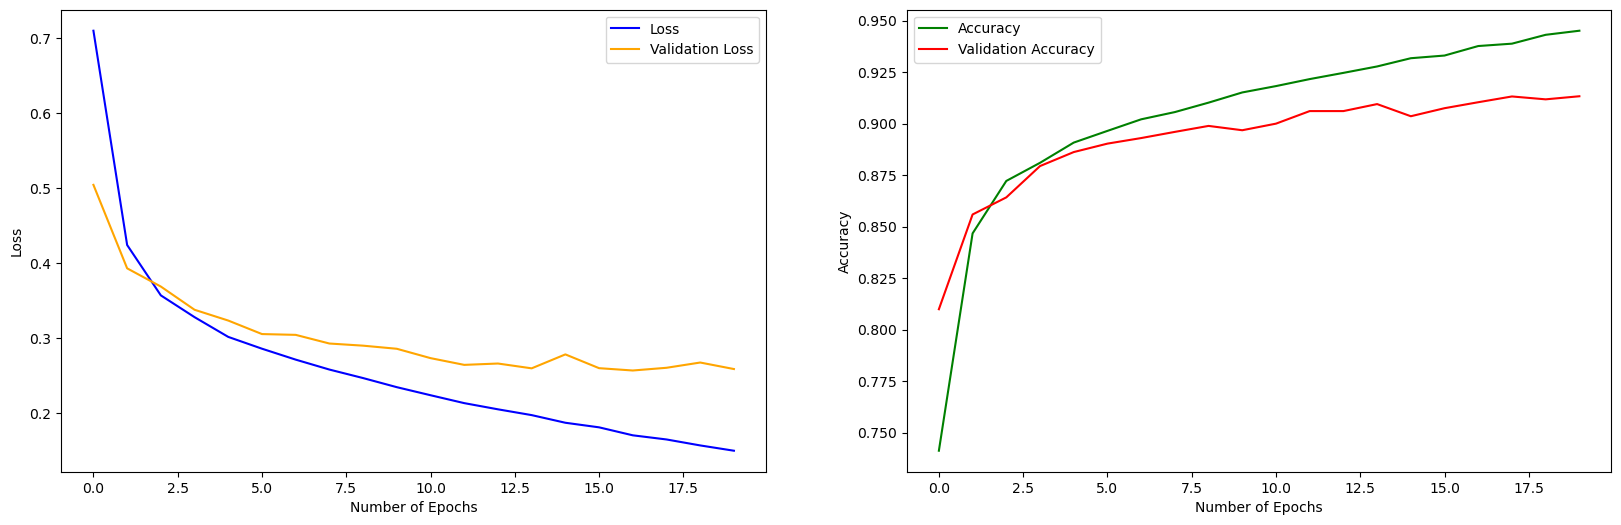

In [22]:

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], color="blue", label = "Loss")
plt.plot(history.history['val_loss'], color="orange", label = "Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color="green", label = "Accuracy")
plt.plot(history.history['val_accuracy'], color="red", label = "Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Epochs")
plt.legend()
plt.show()
     

In [23]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.2584 - accuracy: 0.9133 - 787ms/epoch - 3ms/step


In [24]:
result = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [26]:
np.argmax(result[0])

9

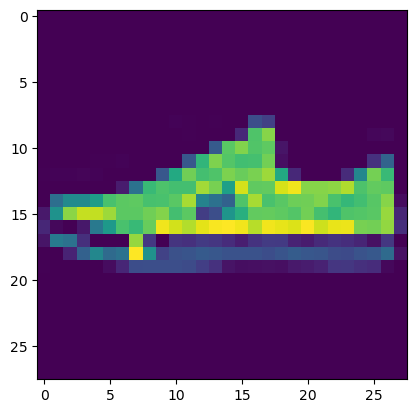

In [36]:
plt.imshow(x_test[333])    